In [1]:
%matplotlib inline
import sys
import numpy as np
import matplotlib.pyplot as plt

import hugs
from hugs.database.tables import Source, Synth

In [2]:
import os
sys.path.append('../scripts')

In [3]:
import pandas as pd
from astropy.table import Table
default_synth_dir = '/tigress/jgreco/hsc-s18a/synths/global'

In [4]:
synth_fn = os.path.join(default_synth_dir, 'global-synth-cat.fits')
cat_fn = '../data/hugs-cat.csv'

In [5]:
hugs_cat = pd.read_csv(cat_fn)
synth_cat = Table.read(synth_fn)

In [6]:
from synth_analysis import match_synths

In [7]:
hugs_match, synth_match = match_synths(hugs_cat, synth_cat)

INFO: finding nearest neighbor within 1.0 arcsec
INFO: finding second nearest neighbor within 1.0 arcsec
INFO: keeping match with better radius measurement


In [8]:
len(synth_match), len(hugs_match) 

(139629, 139629)

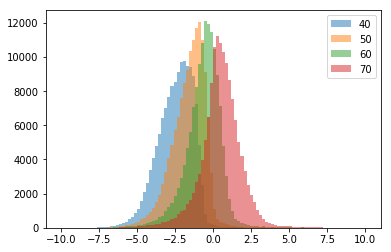

In [12]:
for frac in np.arange(40, 80, 10):
    plt.hist(hugs_match['flux_radius_' + str(frac) + '_i'] - synth_match['r_e'], 
             range=[-10, 10], bins=100, label=str(frac), alpha=0.5)
plt.legend()